[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/lisphilar/covid19-sir/HEAD?labpath=example%2F01_data_preparation.ipynb)

# Data preparation
The first step of data science is data preparation. `covsirphy` has the following three functionality for that.

1. Downloading datasets from recommended data servers
2. Reading `pandas.DataFrame`
3. Generator of sample data with SIR-derived ODE model

In [1]:
from datetime import date
from pprint import pprint
import numpy as np
import pandas as pd
import covsirphy as cs
cs.__version__

'3.0.0'

From version 2.28.0, some classes and methods output the following information using [loguru: library which aims to bring enjoyable logging in Python](https://github.com/Delgan/loguru). We can change logging level with `cs.config(level=2)` (as default).

- `level=0`: errors (exceptions)
- `level=1`: errors, warnings
- `level=2`: errors, warnings, info (start downloading/optimization)
- `level=3`: errors, warnings, info, debug

In [2]:
cs.config.logger(level=2)

## 1. Downloading datasets from recommended data 
We will download datasets from the following recommended data servers.

* **[COVID-19 Data Hub](https://covid19datahub.io/)**
    * Guidotti, E., Ardia, D., (2020), “COVID-19 Data Hub”, Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
    * The number of cases (JHU style)
    * Population values in each country/province
    * [Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker)
    * The number of tests
* **[Our World In Data](https://github.com/owid/covid-19-data/tree/master/public/data)**
    * Hasell, J., Mathieu, E., Beltekian, D. et al. A cross-country database of COVID-19 testing. Sci Data 7, 345 (2020). https://doi.org/10.1038/s41597-020-00688-8
    * The number of tests
    * The number of vaccinations
    * The number of people who received vaccinations
* **[COVID-19 Open Data by Google Cloud Platform](https://github.com/GoogleCloudPlatform/covid-19-open-data)**
    * O. Wahltinez and others (2020), COVID-19 Open-Data: curating a fine-grained, global-scale data repository for SARS-CoV-2, Work in progress, https://goo.gle/covid-19-open-data
    * percentage to baseline in visits
    * Note: Please refer to [Google Terms of Service](https://policies.google.com/terms) in advance.
    * **This will be removed because not updated. Refer to https://github.com/lisphilar/covid19-sir/issues/1224**
* **[World Population Prospects 2022](https://population.un.org/wpp/)**
    * United Nations, Department of Economic and Social Affairs, Population Division (2022). World Population Prospects 2022, Online Edition.
    * Total population in each country
* **[Datasets for CovsirPhy](https://github.com/lisphilar/covid19-sir/tree/master/data)**
    * Hirokazu Takaya (2020-2022), GitHub repository, COVID-19 dataset in Japan, https://github.com/lisphilar/covid19-sir/tree/master/data
    * The number of cases in Japan (total/prefectures)
    * Metadata regarding Japan prefectures

***

How to request new data loader:  
If you want to use a new dataset for your analysis, please kindly inform us using [GitHub Issues: Request new method of DataLoader class](https://github.com/lisphilar/covid19-sir/issues/new/?template=request-new-method-of-dataloader-class.md). Please read [Guideline of contribution](https://lisphilar.github.io/covid19-sir/CONTRIBUTING.html) in advance.

### 1-1. With `DataEngineer` class
We can use `DataEngineer().download()` for data downloading from recommended data servers as the quickest way.

For some countries (eg. USA), city-level data is available and we can download it as follows.

In [3]:
eng_USA = cs.DataEngineer()
eng_USA.download(country=None, databases=["japan", "covid19dh", "owid"])
eng_USA.all()

,ISO3,Province,City,Date,Cancel_events,Confirmed,Contact_tracing,Country,Fatal,Gatherings_restrictions,...,Stay_home_restrictions,Stringency_index,Testing_policy,Tests,Transport_closing,Vaccinated_full,Vaccinated_once,Vaccinations,Vaccinations_boosters,Workplace_closing
0,ABW,-,-,2020-01-22,0.0,<NA>,0.0,Aruba,<NA>,0.0,...,0.0,0.0,0.0,<NA>,0.0,<NA>,<NA>,<NA>,<NA>,0.0
1,ABW,-,-,2020-01-23,0.0,<NA>,0.0,Aruba,<NA>,0.0,...,0.0,0.0,0.0,<NA>,0.0,<NA>,<NA>,<NA>,<NA>,0.0
2,ABW,-,-,2020-01-24,0.0,<NA>,0.0,Aruba,<NA>,0.0,...,0.0,0.0,0.0,<NA>,0.0,<NA>,<NA>,<NA>,<NA>,0.0
3,ABW,-,-,2020-01-25,0.0,<NA>,0.0,Aruba,<NA>,0.0,...,0.0,0.0,0.0,<NA>,0.0,<NA>,<NA>,<NA>,<NA>,0.0
4,ABW,-,-,2020-01-26,0.0,<NA>,0.0,Aruba,<NA>,0.0,...,0.0,0.0,0.0,<NA>,0.0,<NA>,<NA>,<NA>,<NA>,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276764,ZWE,-,-,2023-03-05,<NA>,264127.0,<NA>,Zimbabwe,5668.0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
276765,ZWE,-,-,2023-03-06,<NA>,264127.0,<NA>,Zimbabwe,5668.0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
276766,ZWE,-,-,2023-03-07,<NA>,264127.0,<NA>,Zimbabwe,5668.0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
276767,ZWE,-,-,2023-03-08,<NA>,264276.0,<NA>,Zimbabwe,5671.0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [4]:
cov_US = pd.DataFrame(eng_USA.all()).query("ISO3 == 'USA'")

In [5]:
cov_US.head()

,ISO3,Province,City,Date,Cancel_events,Confirmed,Contact_tracing,Country,Fatal,Gatherings_restrictions,...,Stay_home_restrictions,Stringency_index,Testing_policy,Tests,Transport_closing,Vaccinated_full,Vaccinated_once,Vaccinations,Vaccinations_boosters,Workplace_closing
258730,USA,-,-,2020-01-03,0.0,<NA>,0.0,United States,<NA>,0.0,...,0.0,0.0,0.0,<NA>,0.0,<NA>,<NA>,<NA>,<NA>,0.0
258731,USA,-,-,2020-01-04,0.0,<NA>,0.0,United States,<NA>,0.0,...,0.0,0.0,0.0,<NA>,0.0,<NA>,<NA>,<NA>,<NA>,0.0
258732,USA,-,-,2020-01-05,0.0,<NA>,0.0,United States,<NA>,0.0,...,0.0,0.0,0.0,<NA>,0.0,<NA>,<NA>,<NA>,<NA>,0.0
258733,USA,-,-,2020-01-06,0.0,<NA>,0.0,United States,<NA>,0.0,...,0.0,0.0,0.0,<NA>,0.0,<NA>,<NA>,<NA>,<NA>,0.0
258734,USA,-,-,2020-01-07,0.0,<NA>,0.0,United States,<NA>,0.0,...,0.0,0.0,0.0,<NA>,0.0,<NA>,<NA>,<NA>,<NA>,0.0


In [6]:
def clean_data(cov_US):
    # Drop columns: 'ISO3', 'Province', 'City'
    cov_US = cov_US.drop(columns=['ISO3', 'Province', 'City'])
    return cov_US

cov_US_clean = clean_data(cov_US.copy())
cov_US_clean.head()

,Date,Cancel_events,Confirmed,Contact_tracing,Country,Fatal,Gatherings_restrictions,Information_campaigns,Internal_movement_restrictions,International_movement_restrictions,...,Stay_home_restrictions,Stringency_index,Testing_policy,Tests,Transport_closing,Vaccinated_full,Vaccinated_once,Vaccinations,Vaccinations_boosters,Workplace_closing
258730,2020-01-03,0.0,<NA>,0.0,United States,<NA>,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,<NA>,0.0,<NA>,<NA>,<NA>,<NA>,0.0
258731,2020-01-04,0.0,<NA>,0.0,United States,<NA>,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,<NA>,0.0,<NA>,<NA>,<NA>,<NA>,0.0
258732,2020-01-05,0.0,<NA>,0.0,United States,<NA>,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,<NA>,0.0,<NA>,<NA>,<NA>,<NA>,0.0
258733,2020-01-06,0.0,<NA>,0.0,United States,<NA>,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,<NA>,0.0,<NA>,<NA>,<NA>,<NA>,0.0
258734,2020-01-07,0.0,<NA>,0.0,United States,<NA>,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,<NA>,0.0,<NA>,<NA>,<NA>,<NA>,0.0


Move forward to [Tutorial: Data engineering](https://lisphilar.github.io/covid19-sir/02_data_engineering.html).

### 1-2. With `DataDownloader` class
`DataEngineer` class is useful because it has data cleaning methods and so on (explained with [Tutorial: Data engineering](https://lisphilar.github.io/covid19-sir/02_data_engineering.html)), but we can use `DataDownloader` class for data downloading.

In [7]:
(np.log(600 + 1) - np.log(1000 + 1))**2

0.2602630672259668

In [8]:
data_loader = cs.DataDownloader(directory="input")
jhu_data = data_loader.jhu()

# Create a scenario analysis class with the records
snl = cs.Scenario(jhu_data, country="US")

# Perform S-R trend analysis
snl.trend()

# Perform phase setting with S-R trend analysis
snl.estimate(cs.SIRF)

# Retrieve the parameter values
df = snl.summary()


AttributeError: 'DataDownloader' object has no attribute 'jhu'

In [ ]:
dl = cs.DataDownloader()
dl_df = dl.layer(country=None, databases=["wpp", "covid19dh", "owid"])

In [ ]:
# Overview of the records
dl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311866 entries, 0 to 311865
Data columns (total 27 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ISO3                                 311866 non-null  string        
 1   Province                             311866 non-null  string        
 2   City                                 311866 non-null  string        
 3   Date                                 311866 non-null  datetime64[ns]
 4   Cancel_events                        197480 non-null  Float64       
 5   Confirmed                            237807 non-null  Float64       
 6   Contact_tracing                      197507 non-null  Float64       
 7   Country                              270860 non-null  string        
 8   Fatal                                220610 non-null  Float64       
 9   Gatherings_restrictions              197480 non-null  Float64       
 

In [ ]:
dl_df.head()

,ISO3,Province,City,Date,Cancel_events,Confirmed,Contact_tracing,Country,Fatal,Gatherings_restrictions,...,Stay_home_restrictions,Stringency_index,Testing_policy,Tests,Transport_closing,Vaccinated_full,Vaccinated_once,Vaccinations,Vaccinations_boosters,Workplace_closing
0,ABW,-,-,1950-07-01,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,ABW,-,-,1951-07-01,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,ABW,-,-,1952-07-01,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,ABW,-,-,1953-07-01,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,ABW,-,-,1954-07-01,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


Note that ISO3/Province/City columns have string data instead of categorical data.

In [ ]:
# Citations
print("\n".join(dl.citations()))

United Nations, Department of Economic and Social Affairs, Population Division (2022). World Population Prospects 2022, Online Edition.
Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
Hasell, J., Mathieu, E., Beltekian, D. et al. A cross-country database of COVID-19 testing. Sci Data 7, 345 (2020). https: //doi.org/10.1038/s41597-020-00688-8


### Acknowledgement

In Feb2020, CovsirPhy project started in [Kaggle platform](https://www.kaggle.com/) with [COVID-19 data with SIR model](https://www.kaggle.com/lisphilar/covid-19-data-with-sir-model) notebook by Hirokazu Takaya helped by Kagglers using the following datasets.

- The number of cases (JHU) and linelist: [Novel Corona Virus 2019 Dataset by SRK](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset)
- Population in each country:  [covid19 global forecasting: locations population by Dmitry A. Grechka](https://www.kaggle.com/dgrechka/covid19-global-forecasting-locations-population)
- The number of cases in Japan: [COVID-19 dataset in Japan by Lisphilar](https://www.kaggle.com/lisphilar/covid19-dataset-in-japan)

The current version of `covsirphy` does not have interfaces to use the datasets in Kaggle because they are not updated at this time. However, we could not have done CovsirPhy project without their supports. Thank you!!

## 2. Reading `pandas.DataFrame`
We may need to use our own datasets for analysis because the dataset is not included in the recommended data servers. `DataEngineer().register()` registers new datasets of `pandas.DataFrame` format.

### 2-2. Convert line list to the number of cases data
Prepare analyzable data, converting the line list to the number of cases. This step may be skipped because we have datasets with the number of cases.

### 2-3. Retrieve total population data
So that we can analyze the data, total population values are necessary (we will confirm this with [Tutorial: SIR-derived ODE models](https://lisphilar.github.io/covid19-sir/03_ode.html) later).

Population data at **country-level** can be retrieved with `DataDownloader().layer(databases=["wpp"])` via `DataEngineer().register(databases=["wpp"])`.

In [ ]:
# Set layers and specify layer name of country
# (which will be converted to ISO3 code for standardization)
eng = cs.DataEngineer(layers=["ISO3", "City"], country=["ISO3"])
# Download and automated registration of population data
eng.download(databases=["wpp"])
# Specify date range to reduce the memory
date_range = (all_df["Date"].min(), all_df["Date"].max())
eng.clean(kinds=["resample"], date_range=date_range)
# Show all data
display(eng.all())
# Show citations
pprint(eng.citations())

,ISO3,City,Date,Population
0,ABW,-,2022-07-01,106445.0
1,AFG,-,2022-07-01,41128771.0
2,AGO,-,2022-07-01,35588987.0
3,AIA,-,2022-07-01,15857.0
4,ALB,-,2022-07-01,2842321.0
...,...,...,...,...
232,XKX,-,2022-07-01,1659714.0
233,YEM,-,2022-07-01,33696614.0
234,ZAF,-,2022-07-01,59893885.0
235,ZMB,-,2022-07-01,20017675.0


['United Nations, Department of Economic and Social Affairs, Population '
 'Division (2022). World Population Prospects 2022, Online Edition.']


### 2-4. Register Monkeypox data
Register the Monkeypox data to `DataEngineer()` instance.

In [ ]:
eng.register(data=all_df, citations=[mp_cite])
# Show all data
display(eng.all())
# Show citations
pprint(eng.citations())

,ISO3,City,Date,Confirmed,Fatal,Population,Recovered
0,ABW,-,2022-01-16,0.0,0.0,<NA>,0.0
1,ABW,-,2022-01-17,0.0,0.0,<NA>,0.0
2,ABW,-,2022-01-18,0.0,0.0,<NA>,0.0
3,ABW,-,2022-01-19,0.0,0.0,<NA>,0.0
4,ABW,-,2022-01-20,0.0,0.0,<NA>,0.0
...,...,...,...,...,...,...,...
70619,ZMB,-,2022-09-19,1.0,0.0,<NA>,0.0
70620,ZMB,-,2022-09-20,1.0,0.0,<NA>,0.0
70621,ZMB,-,2022-09-21,1.0,0.0,<NA>,0.0
70622,ZMB,-,2022-09-22,1.0,0.0,<NA>,0.0


['United Nations, Department of Economic and Social Affairs, Population '
 'Division (2022). World Population Prospects 2022, Online Edition.',
 'Global.health Monkeypox (accessed on 2023-06-24):\n'
 'Kraemer, Tegally, Pigott, Dasgupta, Sheldon, Wilkinson, Schultheiss, et al. '
 'Tracking the 2022 Monkeypox Outbreak with Epidemiological Data in Real-Time. '
 'The Lancet Infectious Diseases. '
 'https://doi.org/10.1016/S1473-3099(22)00359-0.\n'
 'European Centre for Disease Prevention and Control/WHO Regional Office for '
 'Europe. Monkeypox, Joint Epidemiological overview, 24 6, 2022']


Move forward to [Tutorial: Data engineering](https://lisphilar.github.io/covid19-sir/02_data_engineering.html).

## 3. Generator of sample data with SIR-derived ODE model
CovsirPhy can generate sample data with subclasses of `ODEModel` and `Dynamics` class. Refer to the followings.

### 3.1 Sample data of one-phase ODE model
Regarding ODE models, please refer to [Tutorial: SIR-derived ODE models](https://lisphilar.github.io/covid19-sir/03_ode.html). Here, we will create a sample data with one-phase SIR model and tau value 1440 min, the first date 01Jan2022, the last date 30Jun2022. ODE parameter values are preset.

In [ ]:
# Create solver with preset
model = cs.SIRModel.from_sample(date_range=("01Jan2022", "30Jun2022"), tau=1440)
# Show settings
pprint(model.settings())

{'date_range': ('01Jan2022', '30Jun2022'),
 'initial_dict': {'Fatal or Recovered': 0,
                  'Infected': 1000,
                  'Susceptible': 999000},
 'param_dict': {'rho': 0.2, 'sigma': 0.075},
 'tau': 1440}


Solve the ODE model with `ODEModel().solve()` method.

In [ ]:
one_df = model.solve()
display(one_df.head())
display(one_df.tail())

,Susceptible,Infected,Fatal or Recovered
Date,,,
2022-01-01,999000,1000,0
2022-01-02,998787,1133,80
2022-01-03,998546,1283,170
2022-01-04,998273,1454,273
2022-01-05,997964,1647,389


,Susceptible,Infected,Fatal or Recovered
Date,,,
2022-06-26,88354,750,910895
2022-06-27,88342,708,910950
2022-06-28,88329,669,911002
2022-06-29,88318,632,911050
2022-06-30,88307,596,911096


Plot the time-series data.

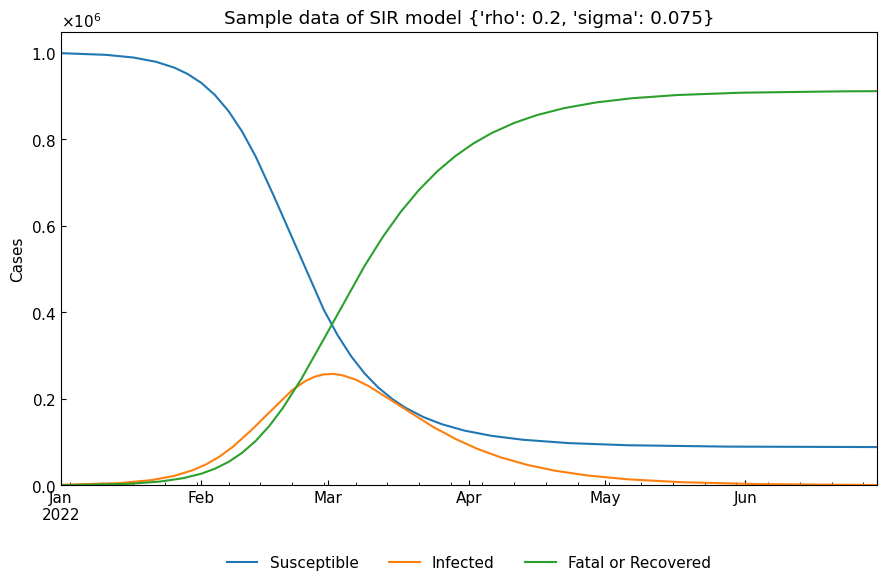

In [ ]:
cs.line_plot(one_df, title=f"Sample data of SIR model {model.settings()['param_dict']}")

### 3.2 Sample data of multi-phase ODE model
Regarding multi-phase ODE models, please refer to [Phase-dependent SIR models](https://lisphilar.github.io/covid19-sir/04_phase_dependent.html). Here, we will create a sample data with two-phase SIR model and tau value 1440 min, the first date 01Jan2022, the last date 30Jun2022.

The 0th phase: 01Jan2022 - 28Feb2022, rho=0.2, sigma=0.075 (preset)  
The 1st phase: 01Mar2022 - 30Jun2022, **rho=0.4**, sigma=0.075

We will use `Dynamics` class. At first, set the first/date of dynamics and set th 0th phase ODE parameters.

In [ ]:
dyn = cs.Dynamics.from_sample(model=cs.SIRModel, date_range=("01Jan2022", "30Jun2022"))
# Show summary
dyn.summary()

,Start,End,Rt,rho,sigma,1/beta [day],1/gamma [day]
Phase,,,,,,,
0th,2022-01-01,2022-06-30,2.67,0.2,0.075,5,13


Add the 1st phase with `Dynamics.register()` method.

In [ ]:
setting_df = dyn.register()
setting_df.loc["01Mar2022": "30Jun2022", ["rho", "sigma"]] = [0.4, 0.075]
setting_df

,Susceptible,Infected,Recovered,Fatal,rho,sigma
Date,,,,,,
2022-01-01,999000,1000,0,0,0.2,0.075
2022-01-02,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2022-01-03,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2022-01-04,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2022-01-05,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...
2022-06-26,<NA>,<NA>,<NA>,<NA>,0.4,0.075
2022-06-27,<NA>,<NA>,<NA>,<NA>,0.4,0.075
2022-06-28,<NA>,<NA>,<NA>,<NA>,0.4,0.075


In [ ]:
dyn.register(data=setting_df)
# Show summary
dyn.summary()

,Start,End,Rt,rho,sigma,1/beta [day],1/gamma [day]
Phase,,,,,,,
0th,2022-01-01,2022-02-28,2.67,0.2,0.075,5,13
1st,2022-03-01,2022-06-30,5.33,0.4,0.075,2,13


Solve the ODE model with `Dynamics().simulate()` method and plot the time-series data.

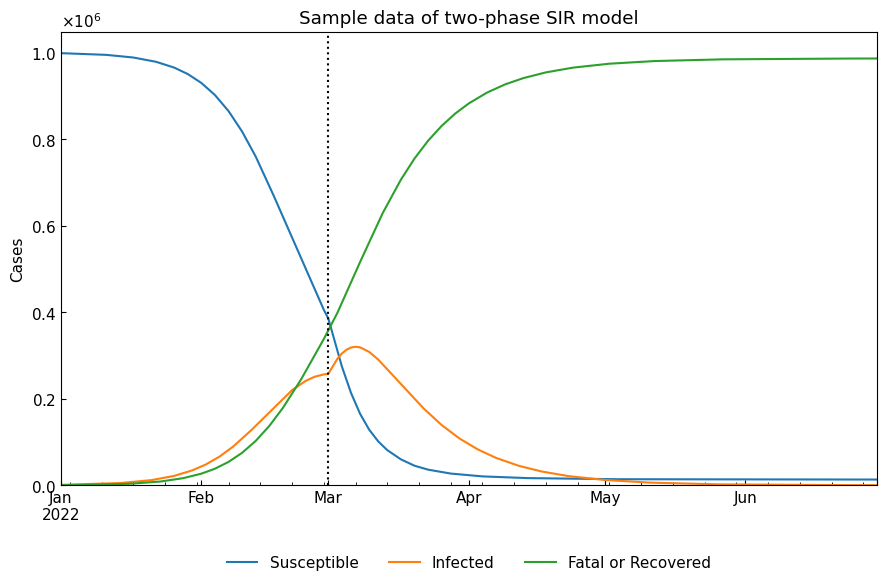

In [ ]:
two_df = dyn.simulate(model_specific=True)
cs.line_plot(two_df, title="Sample data of two-phase SIR model", v=["01Mar2022"])

When we need convert model-specific variables to model-free variables (Susceptible/Infected/Fatal/Recovered), we will set `model_specific=False` (default).
Because R="Fatal or Recovered" in SIR model, we assume that R="Recovered" and F = 0.

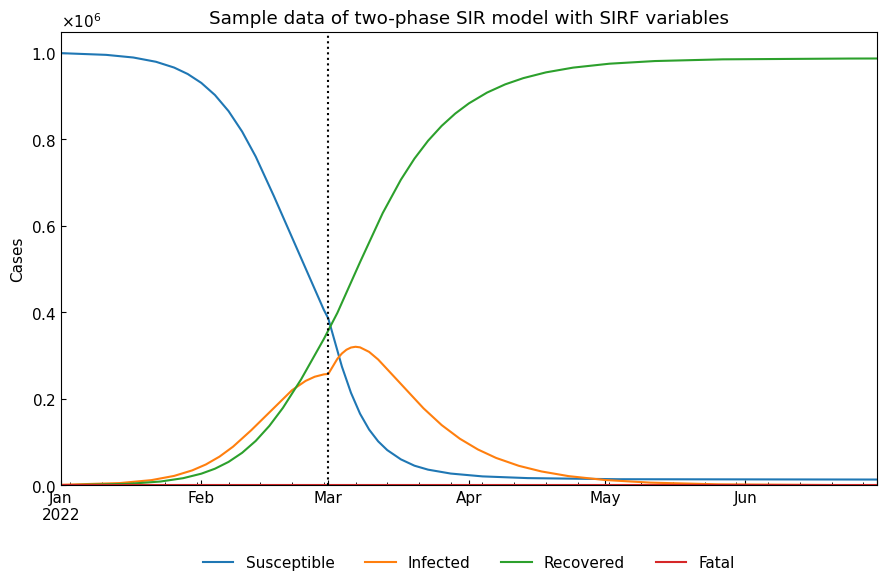

In [ ]:
two_df = dyn.simulate(model_specific=False)
cs.line_plot(two_df, title="Sample data of two-phase SIR model with SIRF variables", v=["01Mar2022"])

Actually, observable variables are Population/Confirmed/Infected/Recovered. We can calculate Population and Confirmed as follows.

- Confirmed = Infected + Fatal + Recovered
- Population = Susceptible + Confirmed

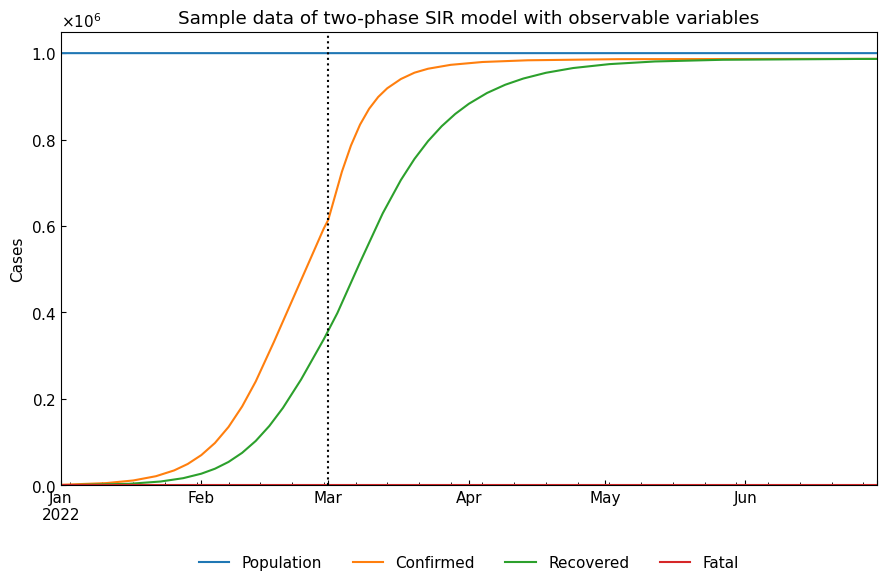

In [ ]:
real_df = two_df.copy()
real_df["Confirmed"] = real_df[["Infected", "Fatal", "Recovered"]].sum(axis=1)
real_df["Population"] = real_df[["Susceptible", "Confirmed"]].sum(axis=1)
real_df = real_df.loc[:, ["Population", "Confirmed", "Recovered", "Fatal"]]
cs.line_plot(real_df, title="Sample data of two-phase SIR model with observable variables", v=["01Mar2022"])

Thank you!